#### K-Means on CDR (call detail records) of 10 users in Dallas, Texas
* use call location to identify user home address

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the CDR data
flc = '/Users/pinqingkan/Desktop/DataScience/PythonDataScience/DAT210x-master/Module5/Datasets/'
fname = flc + 'CDR.csv'
X = pd.read_csv(fname)

In [3]:
X.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


In [4]:
# convert string to datetime & time delta
Z = pd.to_datetime(X.CallDate)
Z2 = pd.to_timedelta(X.CallTime)
X2 = X.drop(axis = 1, labels = ['CallDate', 'CallTime'])
X2 = pd.concat([X2, Z, Z2], axis = 1)

In [5]:
# obtain a list of distinct incoming phone calls
incoming = X2.In.unique().tolist()
incoming

[4638472273,
 1559410755,
 4931532174,
 2419930464,
 1884182865,
 3688089071,
 4555003213,
 2068627935,
 2894365987,
 8549533077]

[[-96.70944573  32.73164942]
 [-96.694722    32.750556  ]]


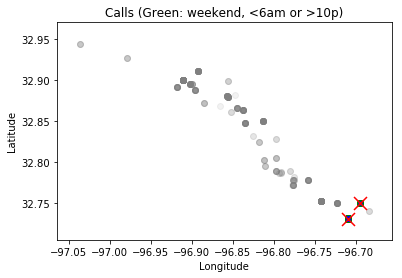

[[-96.92355165  32.87097035]]


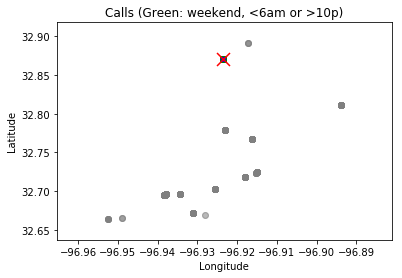

[[-96.86526087  32.86557287]]


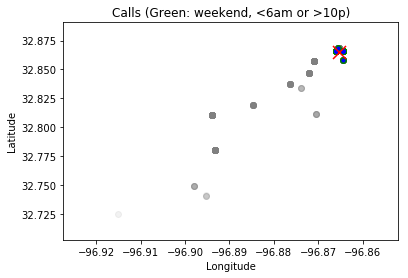

[[-96.83497088  32.84710424]
 [-96.852389    32.861222  ]
 [-96.8375      32.836944  ]]


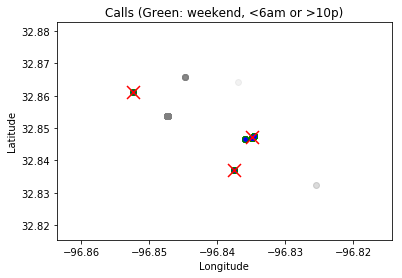

[[-96.730278  32.875   ]
 [-96.759694  32.917333]]


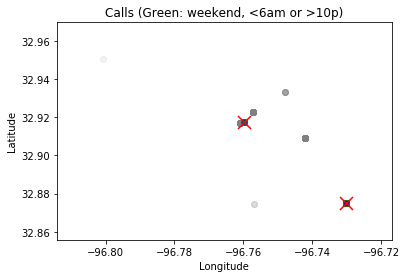

[[-96.685556  32.770833]]


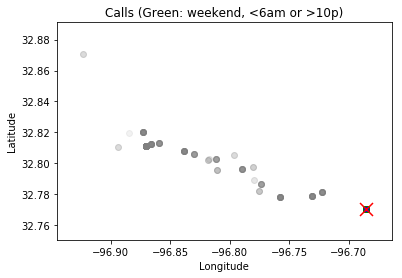

[[-96.840667  32.705222]
 [-96.840556  32.695   ]]


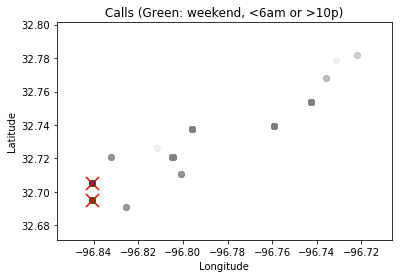

[[-96.604444  32.703056]]


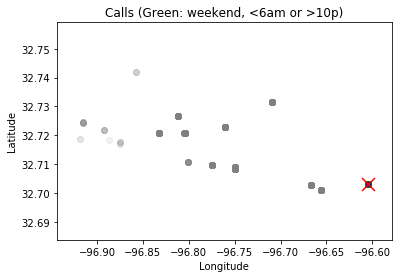

[[-96.81277401  32.77401172]
 [-96.920139    32.702     ]]


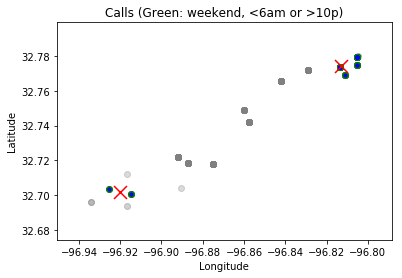

[[-96.777278  32.772361]
 [-96.831472  33.01525 ]
 [-96.800278  32.771667]]


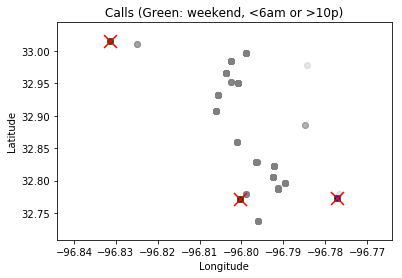

In [6]:
# look at each user one by one
for iuser in range(len(incoming)):
    Y = X2[X.In == incoming[iuser]]
    
    # focus on those on weekends
    Y2 = Y[(Y.DOW == 'Sat') | (Y.DOW == 'Sun')]
    # & those at late hours (< 6am / > 10pm)
    Y2 = Y2[(Y2.CallTime < '06:00:00') | (Y2.CallTime > '22:00:00')]
    # show the call locations
    plt.scatter(Y.TowerLon, Y.TowerLat, c='gray', alpha=0.1)
    plt.scatter(Y2.TowerLon, Y2.TowerLat, c='g', marker='o')
    plt.title('Calls (Green: weekend, <6am or >10p)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # plt.show()
    
    # K cluster on the call location
    if iuser in [0, 4, 6, 8]:
        K = 2
    elif iuser in [3, 9]:
        K = 3
    else:
        K = 1
    Z = Y2.loc[:, ['TowerLon', 'TowerLat']]
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(Z)
    KMeans(n_clusters = K, max_iter = 300, n_init = 10, init = 'k-means++', copy_x = True,
           n_jobs = 1, precompute_distances = 'auto', random_state = None, tol = 1e-4,
           verbose = 0)
    centroids = kmeans.cluster_centers_
    print(centroids)
    
    # visualize the clustering
    plt.scatter(Z.TowerLon, Z.TowerLat, c = 'b', marker = '.')
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', linewidths=3, s=169)
    #xx = np.mean(Z.TowerLon)
    #yy = np.mean(Z.TowerLat)
    #flocation = str(round())
    #plt.text(xx-.1, yy+.05, r'')
    #plt.title('Weekend calls (<6am or >10p)')
    #plt.xlabel('Longitude')
    #plt.ylabel('Latitude')
    plt.show()